In [1]:
%load_ext autoreload
%autoreload 2
from src.data_collection import *
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt

# Create setup:

In [2]:
import os
os.makedirs("data/raw", exist_ok=True)
os.makedirs("data/clean", exist_ok=True)
os.makedirs("data/compressed", exist_ok=True)

# Data scraping from Wikipedia lists:

In [3]:
urls = [
"https://en.wikipedia.org/wiki/List_of_fiction_works_made_into_feature_films_(0-9,_A-C)",
"https://en.wikipedia.org/wiki/List_of_fiction_works_made_into_feature_films_(D-J)",
"https://en.wikipedia.org/wiki/List_of_fiction_works_made_into_feature_films_(K-R)",
"https://en.wikipedia.org/wiki/List_of_fiction_works_made_into_feature_films_(S-Z)",
"http://en.wikipedia.org/wiki/List_of_short_fiction_made_into_feature_films",
"https://en.wikipedia.org/wiki/List_of_children%27s_books_made_into_feature_films",
#"https://en.wikipedia.org/wiki/List_of_films_based_on_comics"
]
df = scrape_wikipedia_list(urls)
df.columns=['Book','author_book','Film',"Year_book", "Year_film"]

df # fix later


,Book,author_book,Film,Year_book,Year_film
0,The 25th Hour,David Benioff,25th Hour,2001,2002
1,3 Assassins,Kōtarō Isaka,Grasshopper,2004,2015
2,4.50 from Paddington,Agatha Christie,"Murder, She Said",1957,1961
3,4.50 from Paddington,Agatha Christie,Crime Is Our Business,1957,2008
4,58 Minutes,Walter Wager,Die Hard 2,1987,1990
...,...,...,...,...,...
5805,Z for Zachariah,Robert C. O'Brien,Z for Zachariah,1974,2015
5806,Zathura,Chris Van Allsburg,Zathura,2002,2005
5807,Zenon: Girl of the 21st Century,Marilyn Sadler,Zenon: Girl of the 21st Century,1997,1999
5808,Zenon: Girl of the 21st Century,Marilyn Sadler,Zenon: The Zequel,1997,2001


In [4]:
r = tmdb_search_movie("zathura")
m = tmdb_get_movie_details(r["id"])
m

{'adult': False,
 'backdrop_path': '/s9Bn7Mx4U9cWOR1WdFZjU1DTAkh.jpg',
 'belongs_to_collection': None,
 'budget': 65000000,
 'genres': [{'id': 878, 'name': 'Science Fiction'},
  {'id': 12, 'name': 'Adventure'},
  {'id': 10751, 'name': 'Family'}],
 'homepage': 'https://www.sonypictures.com/movies/zathura',
 'id': 6795,
 'imdb_id': 'tt0406375',
 'origin_country': ['US'],
 'original_language': 'en',
 'original_title': 'Zathura: A Space Adventure',
 'overview': 'After their father is called into work, two young boys, Walter and Danny, are left in the care of their teenage sister, Lisa, and told they must stay inside. Walter and Danny, who anticipate a boring day, are shocked when they begin playing Zathura, a space-themed board game, which they realize has mystical powers when their house is shot into space. With the help of an astronaut, the boys attempt to return home.',
 'popularity': 4.5906,
 'poster_path': '/gDb5BW2NLqZ9cvg9nyzkZVvmgze.jpg',
 'production_companies': [{'id': 2550,
   '

# Scraping tmdb data:

In [5]:
needed = False
if (needed==True): 
    data = {
    "Book" : [],
    "author_book": [],
    "Film" : [],
    "date_film" : [],
    "runtime" : [],
    "original_language":[],
    "votes_film" : [],
    "overview_film" : [],
    "vote_count_film" : [],
    "popularity_film" : [],
    "budget_film" : [],
    "revenue_film" : [],
    "Genre" : [],
    "Director" : [],
    "Actor1" : [],
    "Actor2" : [],
    "Actor3" : []
}
    for i in tqdm(range(len(df))):
        n = df["Film"][i]
        y = df["Year_film"][i]
        k = tmdb_search_movie(n,year=y)
        if k is not None and "id" in list(k.keys()):
            k = tmdb_get_movie_details(k["id"])
        if k is not None:
            data["votes_film"].append(k["vote_average"])
            data["Film"].append(k["original_title"])
            data["date_film"].append(k["release_date"])
            data["overview_film"].append(k["overview"])        
            data["vote_count_film"].append(k["vote_count"])
            data["popularity_film"].append(k["popularity"])
            data["Genre"].append(k["genres"])
            data["original_language"].append(k["original_language"])
            data["runtime"].append(k["runtime"])
            direc = None
            if 'credits' in k and 'crew' in k['credits']:
                for person in k['credits']['crew']:
                    if person['job'] == 'Director':
                        data["Director"].append(person['name'])
                        direc = person['name']
                        break
            if direc is None:
                data['Director'].append(np.nan)
            if 'credits' in k and 'cast' in k['credits']:
                for i in range(min(3, len(k['credits']['cast']))):
                    data[f"Actor{i+1}"].append(k['credits']['cast'][i]['name'])
                if len(k['credits']['cast']) < 3:
                    for i in range(len(k['credits']['cast']), 3):
                        data[f"Actor{i+1}"].append(np.nan)
    
            if "budget" in list(k.keys()):
                data["budget_film"].append(k["budget"])
            else: 
                data["budget_film"].append(np.nan)
            if "revenue" in list(k.keys()): 
                data["revenue_film"].append(k["revenue"])
            else: 
                data["revenue_film"].append(np.nan)
        else: 
            data["votes_film"].append(np.nan)
            data["Film"].append(n)
            data["date_film"].append(str(y))
            data["overview_film"].append(np.nan)
            data["vote_count_film"].append(np.nan)
            data["popularity_film"].append(np.nan)
            data["budget_film"].append(np.nan)
            data["revenue_film"].append(np.nan)
            data["Genre"].append(np.nan)
            data["Director"].append(np.nan)
            data["Actor1"].append(np.nan)
            data["Actor2"].append(np.nan)
            data["Actor3"].append(np.nan)
            data["original_language"].append(np.nan)
            data["runtime"].append(np.nan)
        data["Book"].append(df["Book"][i])
        data["author_book"].append(df["author_book"][i])
    df = pd.DataFrame(data)
    df.to_csv("data/raw/movie_adaptation_list.csv")
    display(df)
else:
    df = pd.read_csv("data/raw/movie_adaptation_list.csv")


In [6]:
import json
df["Book"] = df["Book"].str.lower()
df2 = pd.read_csv("data/raw/booksummaries.csv",sep="\t")
df2.columns=["a1","a2","Book","Author","Year","Genre","Overview"]
df2 = df2.drop(columns=["a1","a2"])
df2["Book"] = df2["Book"].str.lower()
genres = []
for i in df2["Genre"]:
    if isinstance(i,str):
        genres.append(list(json.loads(i).values()))
    else:
        genres.append(np.nan)
df2["Genre"] = genres
overviews = []
genres = []
for i in df["Book"]:
    overview = np.nan
    genre = np.nan
    if (df2["Book"] == i).any():
        overview = df2.loc[df2["Book"] == i, "Overview"].iloc[0]
        genre = df2.loc[df2["Book"] == i, "Genre"].iloc[0]
    overviews.append(overview)
    genres.append(genre)
df["overview_book"] = overviews
df["Genre_book"] = genres
df

,Unnamed: 0,Book,author_book,Film,date_film,runtime,original_language,votes_film,overview_film,vote_count_film,popularity_film,budget_film,revenue_film,Genre,Director,Actor1,Actor2,Actor3,overview_book,Genre_book
0,0,4.50 from paddington,Agatha Christie,25th Hour,2002-12-19,135.0,en,7.320,In New York City in the days following the eve...,2463.0,1.5834,5000000.0,23932055.0,"[{'id': 80, 'name': 'Crime'}, {'id': 18, 'name...",Spike Lee,Edward Norton,Philip Seymour Hoffman,Barry Pepper,Elspeth McGillicuddy has come from Scotland t...,"[Cozy, Mystery, Crime Fiction, Fiction, Suspense]"
1,1,4.50 from paddington,Agatha Christie,グラスホッパー,2015-11-07,119.0,ja,5.800,Movie contains the stories of three people: Su...,13.0,3.7769,0.0,0.0,"[{'id': 80, 'name': 'Crime'}, {'id': 53, 'name...",Tomoyuki Takimoto,Tadanobu Asano,Toma Ikuta,Ryosuke Yamada,Elspeth McGillicuddy has come from Scotland t...,"[Cozy, Mystery, Crime Fiction, Fiction, Suspense]"
2,2,4.50 from paddington,Agatha Christie,Murder She Said,1961-09-26,87.0,en,7.316,Miss Marple believes she's seen a murder in a ...,220.0,1.5202,0.0,0.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 80, 'nam...",George Pollock,Margaret Rutherford,Arthur Kennedy,Muriel Pavlow,Elspeth McGillicuddy has come from Scotland t...,"[Cozy, Mystery, Crime Fiction, Fiction, Suspense]"
3,3,4.50 from paddington,Agatha Christie,Le crime est notre affaire,2008-10-02,109.0,fr,5.883,"Loosely based on ""4.50 from Paddington"" by Aga...",94.0,1.5241,12000000.0,0.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 80, 'nam...",Pascal Thomas,Catherine Frot,André Dussollier,Claude Rich,Elspeth McGillicuddy has come from Scotland t...,"[Cozy, Mystery, Crime Fiction, Fiction, Suspense]"
4,4,4.50 from paddington,Agatha Christie,Die Hard 2,1990-07-03,124.0,en,7.000,"One year after his heroics in Los Angeles, Joh...",6138.0,8.8950,70000000.0,240031094.0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",Renny Harlin,Bruce Willis,Bonnie Bedelia,William Sadler,Elspeth McGillicuddy has come from Scotland t...,"[Cozy, Mystery, Crime Fiction, Fiction, Suspense]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5805,5805,4.50 from paddington,Agatha Christie,Z for Zachariah,2015-08-13,97.0,en,5.687,"In the wake of a nuclear war, a young woman su...",966.0,3.3732,0.0,121461.0,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",Craig Zobel,Margot Robbie,Chiwetel Ejiofor,Chris Pine,Elspeth McGillicuddy has come from Scotland t...,"[Cozy, Mystery, Crime Fiction, Fiction, Suspense]"
5806,5806,4.50 from paddington,Agatha Christie,Zathura: A Space Adventure,2005-11-06,101.0,en,6.430,"After their father is called into work, two yo...",3442.0,4.5906,65000000.0,65079104.0,"[{'id': 878, 'name': 'Science Fiction'}, {'id'...",Jon Favreau,Josh Hutcherson,Jonah Bobo,Dax Shepard,Elspeth McGillicuddy has come from Scotland t...,"[Cozy, Mystery, Crime Fiction, Fiction, Suspense]"
5807,5807,4.50 from paddington,Agatha Christie,Zenon: Girl of the 21st Century,1999-01-23,97.0,en,6.000,"Zenon Kar, a 13-year-old girl who lives on a s...",183.0,1.1902,0.0,0.0,"[{'id': 10751, 'name': 'Family'}, {'id': 12, '...",Kenneth Johnson,Kirsten Storms,Raven-Symoné,Stuart Pankin,Elspeth McGillicuddy has come from Scotland t...,"[Cozy, Mystery, Crime Fiction, Fiction, Suspense]"
5808,5808,4.50 from paddington,Agatha Christie,Zenon: The Zequel,2001-01-12,89.0,en,5.600,Zenon Kar is 15 and lives on a space station w...,108.0,1.5166,0.0,0.0,"[{'id': 10751, 'name': 'Family'}, {'id': 10770...",Manny Coto,Kirsten Storms,Shadia Simmons,Lauren Maltby,Elspeth McGillicuddy has come from Scotland t...,"[Cozy, Mystery, Crime Fiction, Fiction, Suspense]"


In [36]:
import numpy as np
count_nan_year = (df["date_film"].isnull()).sum().sum()
count_nan_director = (df["Director"].isnull()).sum().sum()
count_nan_actor1 = (df["Actor1"].isnull()).sum().sum()
count_nan_genre = (df["Genre"].isnull()).sum().sum()
count_nan_overview_film = (df["overview_film"].isnull()).sum().sum()
count_nan_overview_book = (df["overview_book"].isnull()).sum().sum()
count_nan_overview_filmandbook = (df["overview_book"].isnull() | df["overview_film"].isnull()).sum().sum()
print(f'{count_nan_year =}')
print(f'{count_nan_genre =}')
print(f'{count_nan_director =}')
print(f'{count_nan_actor1 =}')
print(f'{count_nan_overview_film =}')
print(f'{count_nan_overview_book =}')
print(f'{count_nan_overview_filmandbook =}')

count_nan_year =np.int64(11)
count_nan_genre =np.int64(523)
count_nan_director =np.int64(550)
count_nan_actor1 =np.int64(582)
count_nan_overview_film =np.int64(559)
count_nan_overview_book =np.int64(318)
count_nan_overview_filmandbook =np.int64(559)


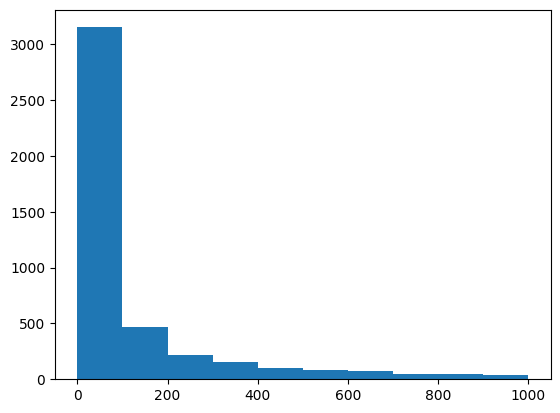

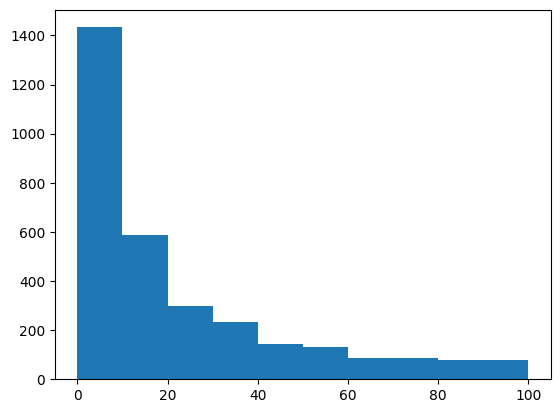

In [32]:
plt.hist(df["vote_count_film"],range =(0,1000))
plt.show()
plt.hist(df["vote_count_film"],range =(0,100))
plt.show()

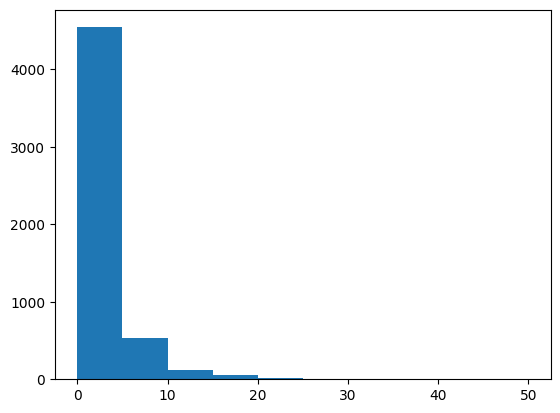

number of outliers for film popularity: 3


In [9]:
x = df["popularity_film"]
plt.hist(x,range=(x.min(), 50))
plt.show()

print(f"number of outliers for film popularity: {(x>x.mean() + 5*x.std()).sum().sum()}")

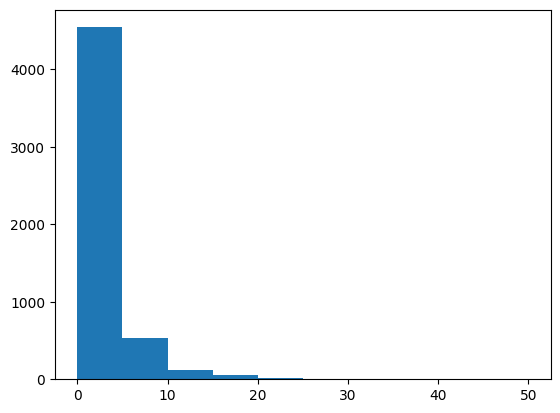

number of outliers for film popularity: 3


In [19]:
x = df["popularity_film"]
plt.hist(x,range=(x.min(), 50))
plt.show()

print(f"number of outliers for film popularity: {(x>x.mean() + 5*x.std()).sum().sum()}")

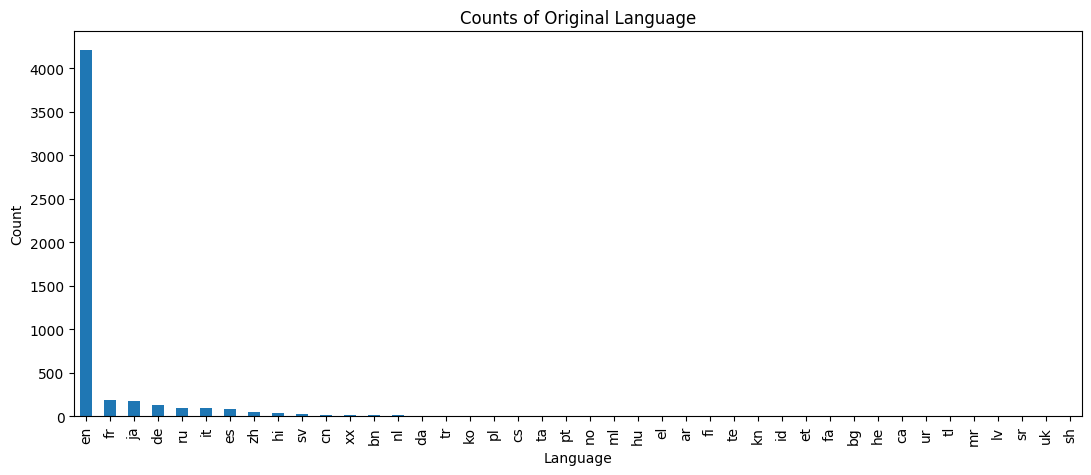

number of NaN:  0
not well presented languages: 
original_language
cs    9
ta    8
pt    8
no    6
ml    6
hu    5
el    5
ar    5
fi    5
te    4
kn    3
id    3
et    3
fa    3
bg    3
he    1
ca    1
ur    1
tl    1
mr    1
lv    1
sr    1
uk    1
sh    1
Name: count, dtype: int64


In [39]:
x = df["original_language"]
x.value_counts().plot(kind='bar', figsize=(13, 5), title='Counts of Original Language')
plt.xlabel('Language')
plt.ylabel('Count')
plt.show()

print("number of NaN: ",(x == np.nan).sum().sum())
print("not well presented languages: ")
print(x.value_counts()[x.value_counts() < 10])

(array([ 360.,   28.,   44.,  118.,  414., 1192., 2081.,  923.,  110.,
          17.]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]),
 <BarContainer object of 10 artists>)

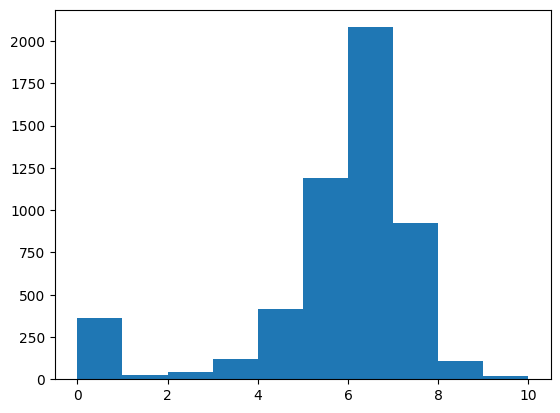

In [27]:
x = df["votes_film"]
plt.hist(x)


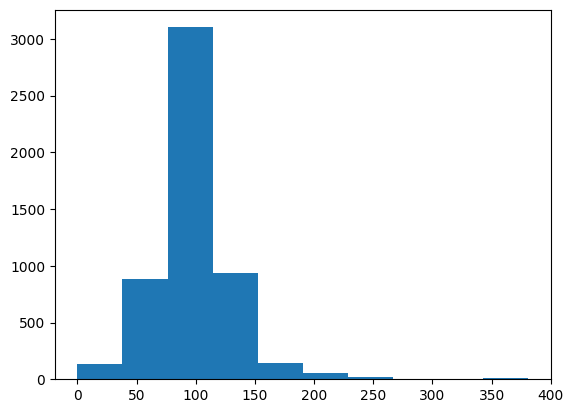

In [38]:
x = df["runtime"]
plt.hist(x)
plt.show()